## Polynomial regression

#### In polynomial regression, we try to take higer order values of the features (or independent vars) to see if they start to align in a linear model like shape. If yes, then we train the linear model on those values

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('../../pierian-data-excercises/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales', axis=1)
y = df['sales']

X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [5]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
poly_feature.fit(X)
transformed_features = poly_feature.transform(X)
transformed_features.shape

(200, 9)

In [6]:
transformed_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [7]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

#### Training and evaulating model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(transformed_features, y, test_size=0.33, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
test_predictions = model.predict(X_test)

In [12]:
test_predictions

array([17.24603859, 22.77295179, 20.32268879,  7.60414127, 24.4333482 ,
       12.62493653, 22.78873917,  8.18760556, 12.08932207, 15.61296139,
        7.71282896,  8.15751717, 11.95892242,  6.00119731, 10.52727132,
       12.3118622 ,  6.71801799, 16.5933546 , 10.59190877, 19.00946479,
       20.16728637, 13.82527608,  9.49605529, 22.09682378,  8.81942319,
        7.64948077, 22.38341302, 12.63635147, 10.14275978,  6.03148738,
       11.64268562, 10.08945034, 23.48605619,  9.73049928, 15.30149892,
       21.05606379, 10.96974257, 20.14669186, 11.75091918,  6.43065028,
       10.72904782, 12.81091878,  9.19738949,  8.93004876, 11.81837446,
        6.98271542,  9.97913621, 14.71577553, 10.12771035, 11.27550929,
       14.03852964, 12.12892569,  8.84093958,  7.49564621,  8.40161153,
       10.88535411,  9.9119957 , 25.22603872,  6.80660968, 11.91241114,
       14.55918632, 15.60572638, 12.17950838,  9.03510176, 12.34816316,
        6.67906937])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = root_mean_squared_error(y_test, test_predictions)

In [14]:
print(MAE)
print(MSE)
print(RMSE)

0.54758379191496
0.46030624938882125
0.6784587307926851


In [15]:
## These results are far better than linear regression

#### Bias-variance tradeoff or (Overfitting vs Underfitting)

In [16]:
## Overfitting: Choosing a degree where model perform really good on training data but fails to give good results on real world data
## Underfitting: Choosing a degree where model performs bad in training an real world data both

In [17]:
## How do we determine what degree to choose?
## By plotting a graph between the error and degree of polynomial chosen, there will be a point after which error starts
## to rise in training and test data, that is the ideal number

### Adjusting model parameters

In [36]:
train_rmse_errors = []
test_rmse_errors = []

for i in range(1, 10):
    features = PolynomialFeatures(include_bias=False, degree=i)
    transformed_features = features.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(transformed_features, y, test_size=0.33, random_state=22)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    test_rmse = root_mean_squared_error(y_test, test_predictions)
    train_rmse = root_mean_squared_error(y_train, train_predictions)

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [37]:
train_rmse_errors

[5.129107176985397,
 4.968027393780937,
 4.718039397409937,
 4.213267978287943,
 3.6705182996032115,
 3.4224992770662155,
 3.0212462324415283,
 2.755605279976851,
 2.65901707361411]

In [38]:
test_rmse_errors

[5.428327447957426,
 5.429473655085172,
 5.250653754483669,
 8.000778836729092,
 9.53750847264338,
 24.74332211470853,
 60.76584516831456,
 1846.0172181009382,
 5729.18082763983]

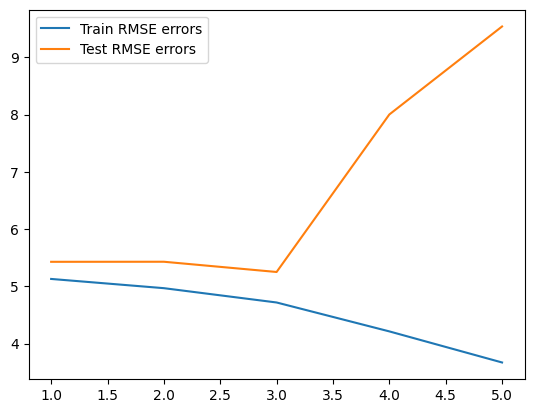

In [44]:
plt.plot(range(1,6), train_rmse_errors[:5], label = "Train RMSE errors")
plt.plot(range(1,6), test_rmse_errors[:5], label = "Test RMSE errors")
plt.legend()

In [35]:
# At degree 3, we can see the training is still improving, but the actual predictions with test data started going wrong.
# So it would be safe to say that 3 was the ideal degree to choose

### Model saving and deployment

In [45]:
final_poly_coverter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()

full_converted_x_data = final_poly_coverter.fit_transform(X)
final_model.fit(full_converted_x_data, y)

LinearRegression()

In [46]:
# Save the model
from joblib import dump, load

In [47]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [48]:
dump(final_poly_coverter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [49]:
# Reading the saved file
converter = load('final_poly_converter.joblib')
model = load('final_poly_model.joblib')

In [50]:
campaign = [[149, 22, 12]]

# But the model needs features based on the degree of polynomial, So we fit_transform to match correct params
actual_input = converter.fit_transform(campaign)
prediction = model.predict(actual_input)

In [51]:
prediction

array([14.64501014])